# AH2179 - Hand-In Assignment 1 - Exercise 2 - Yudhistira Aditya Widyasena

## Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Linnégatan

## Load Data (df for Linnégatan)

In [ ]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [ ]:
df.shape

(2179, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


## Data Exploration

In [ ]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

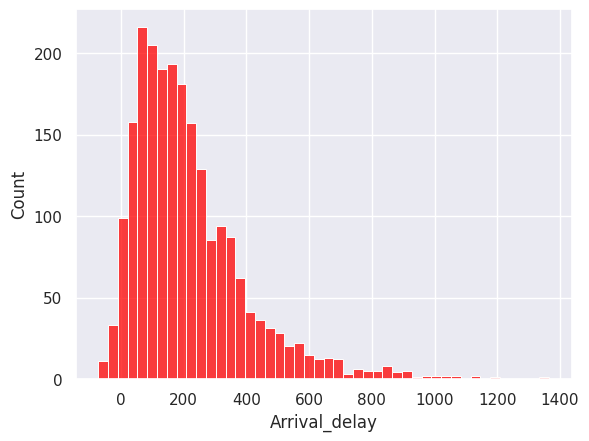

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'], color='red')

In [ ]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.993935
Dwell_time,0.218745
Recurrent_delay,0.162692
Scheduled_travel_time,0.100695


## Feature Engineering

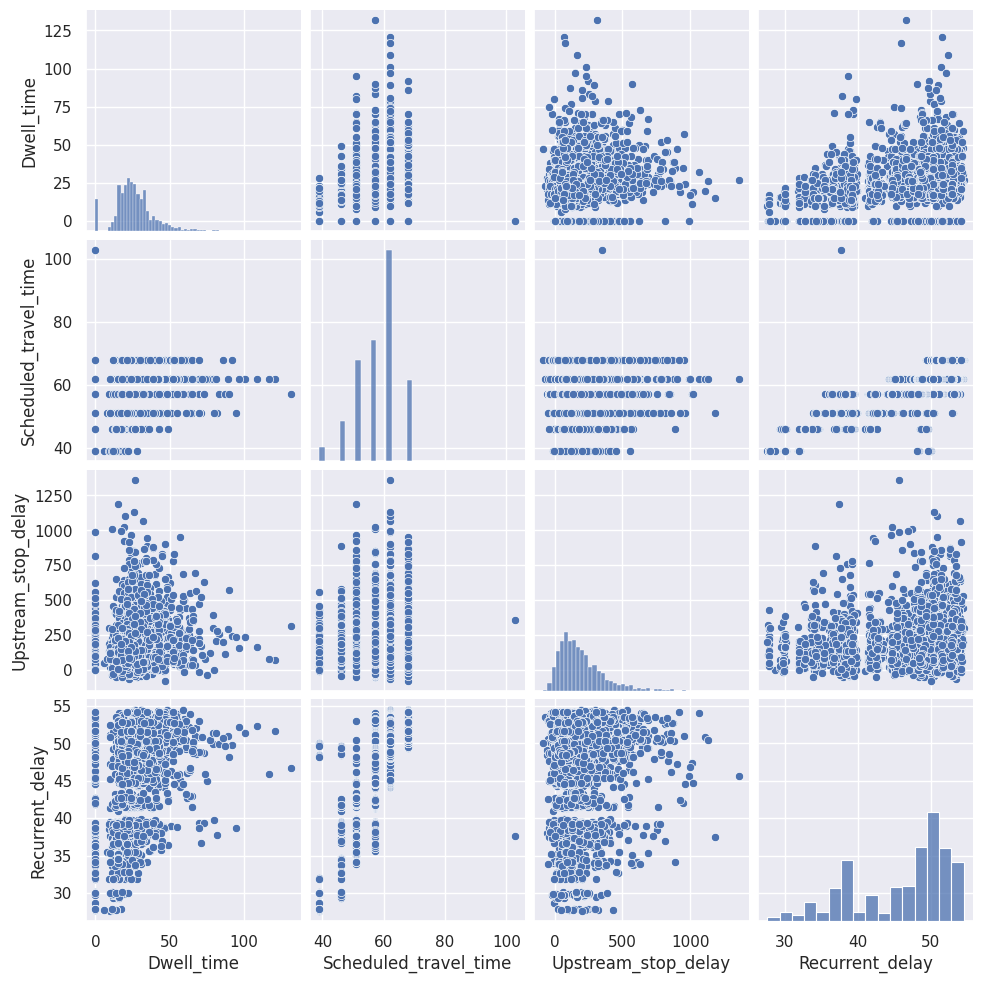

In [ ]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

## Train/Test Split and Feature Scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Hyperparameter Tuning

Experiment 1

In [ ]:
# Define a parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'subsample': [0.75, 1.0]
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, verbose=2)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params1 = grid_search.best_params_

print("Best Parameters:", best_params1)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=  

Experiment 2

In [ ]:
# Define a parameter grid for XGBoost
param_grid = {
    'n_estimators': [150, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.5, 1.0]
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, verbose=2)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params2 = grid_search.best_params_

print("Best Parameters:", best_params2)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s

Experiment 3

In [ ]:
# Define a parameter grid for XGBoost
param_grid = {
    'n_estimators': [200, 250],
    'learning_rate': [0.05, 0.15],
    'max_depth': [2, 3],
    'subsample': [0.75, 1.0]
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, verbose=2)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params3 = grid_search.best_params_

print("Best Parameters:", best_params3)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=  

## Model Training and Making Predictions

In [ ]:
# Train the final model with the best parameters
best_xgb = XGBRegressor(**best_params3, objective='reg:squarederror', random_state=42)
best_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the test data
y_pred = best_xgb.predict(X_test_scaled)

## Model Evaluation

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.725065978226858
Mean Squared Error: 212.27351181805182
Root Mean Squared Error: 14.56960918549471
R-squared: 0.9928814954430415


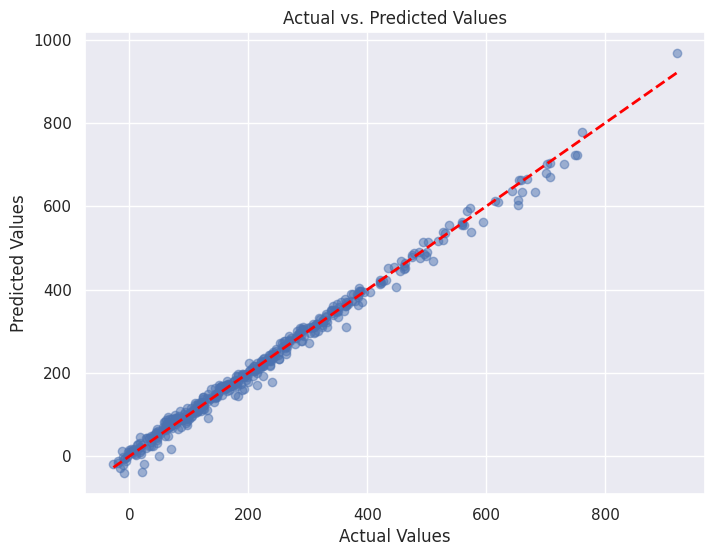

In [ ]:
# Create a scatter plot to visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

# Skanstull

## Load Data (data for Skanstull)

In [ ]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2optional.csv'
data = pd.read_csv(url)

# data = pd.read_csv('Exercise2optional.csv')
data.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507
5,01/05/2022 20:46,10261,44413,3,-17,0,109,-15,115.550725
6,01/05/2022 21:02,10261,45540,3,37,0,109,46,115.428571
7,01/05/2022 21:17,10261,41724,3,0,26,109,16,108.761194
8,01/05/2022 21:31,10261,44417,3,-6,14,109,-36,108.147059
9,01/05/2022 21:46,10261,45544,3,-39,0,109,-18,108.391304


In [ ]:
data.shape

(4962, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


## Data Exploration

In [ ]:
data = data.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

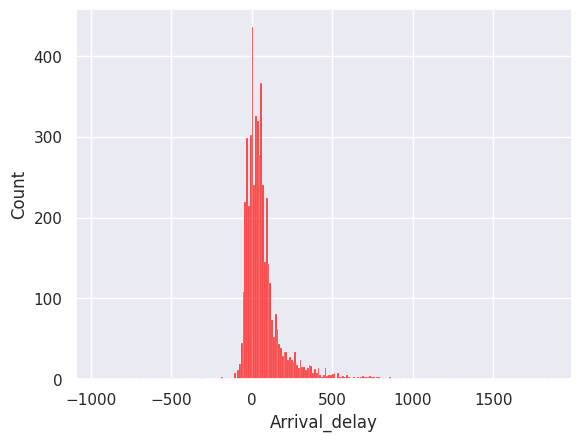

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=data['Arrival_delay'], color='red')

In [ ]:
corr_matrix = data.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.941217
Dwell_time,0.060793
Recurrent_delay,0.024228
Scheduled_travel_time,-0.080843


## Feature Engineering

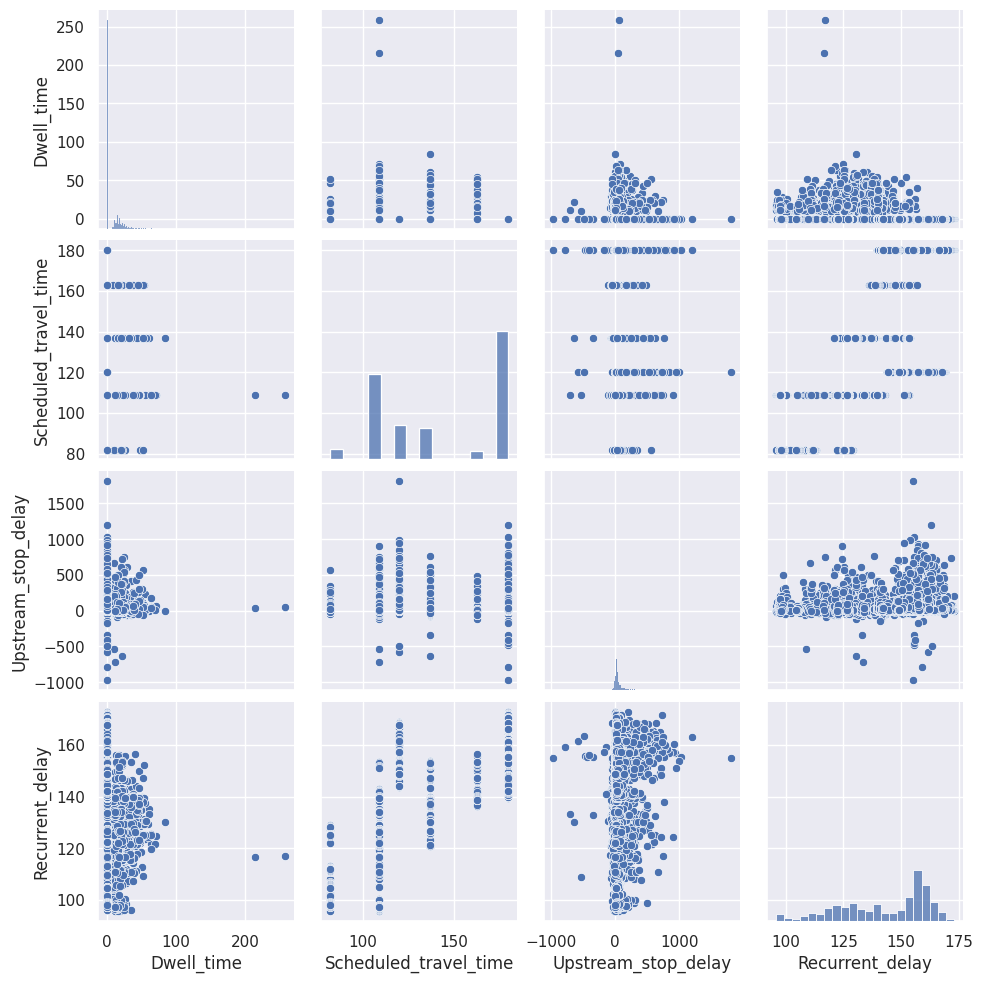

In [ ]:
x2 = data.drop(['Arrival_delay'], axis=1)
y2 = data['Arrival_delay']

sns.pairplot(x2)

## Train/Test Split and Feature Scaling

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

## Hyperparameter Tuning

Experiment 1

In [ ]:
# Define a parameter grid for XGBoost
param_grid2 = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'subsample': [0.75, 1.0]
}

# Initialize XGBRegressor
xgb_model2 = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model2, param_grid2, cv=5, verbose=2)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X2_train_scaled, y2_train)

# Get the best parameters from the grid search
best_params12 = grid_search.best_params_

print("Best Parameters:", best_params12)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=  

Experiment 2

In [ ]:
# Define a parameter grid for XGBoost
param_grid2 = {
    'n_estimators': [150, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.5, 1.0]
}

# Initialize XGBRegressor
xgb_model2 = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model2, param_grid2, cv=5, verbose=2)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X2_train_scaled, y2_train)

# Get the best parameters from the grid search
best_params22 = grid_search.best_params_

print("Best Parameters:", best_params22)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.1s

Experiment 3

In [ ]:
# Define a parameter grid for XGBoost
param_grid2 = {
    'n_estimators': [200, 250],
    'learning_rate': [0.05, 0.15],
    'max_depth': [2, 3],
    'subsample': [0.75, 1.0]
}

# Initialize XGBRegressor
xgb_model2 = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model2, param_grid2, cv=5, verbose=2)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X2_train_scaled, y2_train)

# Get the best parameters from the grid search
best_params32 = grid_search.best_params_

print("Best Parameters:", best_params32)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1.0; total time=  

## Model Training and Making Predictions

In [ ]:
# Train the final model with the best parameters
best_xgb2 = XGBRegressor(**best_params32, objective='reg:squarederror', random_state=42)
best_xgb2.fit(X2_train_scaled, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the test data
y2_pred = best_xgb2.predict(X2_test_scaled)

## Model Evaluation

In [ ]:
# Calculate evaluation metrics
mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y2_test, y2_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae2}")
print(f"Mean Squared Error: {mse2}")
print(f"Root Mean Squared Error: {rmse2}")
print(f"R-squared: {r22}")

Mean Absolute Error: 29.421813404084393
Mean Squared Error: 1654.5565369576211
Root Mean Squared Error: 40.67624044768176
R-squared: 0.8914389779484504


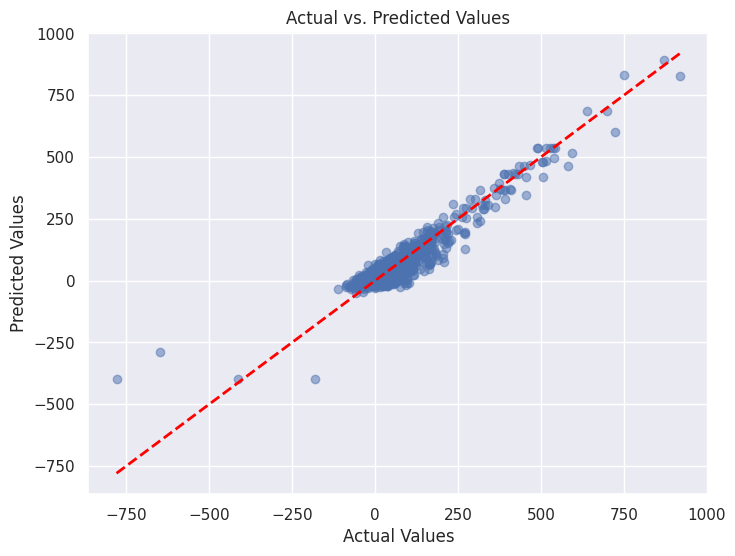

In [ ]:
# Create a scatter plot to visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], linestyle='--', color='red', lw=2)
plt.show()